 <h3 style="text-align:center"> Import </h3>

首先，导入相关的库

In [6]:
import warnings
import itertools
import pandas as pd
import numpy as np
from numpy import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.metrics import mean_squared_error

In [40]:
import numpy as np
import matplotlib.pyplot as plt

path = '评价标准/Fed.txt'  # 数据集路径

series = np.loadtxt(path)

windowLen = 12             # 嵌入窗口长度
seriesLen = len(series)     # 序列长度
K = seriesLen - windowLen + 1
X = np.zeros((windowLen, K))
for i in range(K):
    X[:, i] = series[i:i + windowLen]

U, sigma, VT = np.linalg.svd(X, full_matrices=False)

for i in range(VT.shape[0]):
    VT[i, :] *= sigma[i]
A = VT

rec = np.zeros((windowLen, seriesLen))
for i in range(windowLen):
    for j in range(windowLen-1):
        for m in range(j+1):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= (j+1)
    for j in range(windowLen-1, seriesLen - windowLen + 1):
        for m in range(windowLen):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= windowLen
    for j in range(seriesLen - windowLen + 1, seriesLen):
        for m in range(j-seriesLen+windowLen, windowLen):
            rec[i, j] += A[i, j - m] * U[m, i]
        rec[i, j] /= (seriesLen - j)
        
Fs = np.sum(rec[0:7,:], axis=0)  # 选择重构的部分，这里选了全部

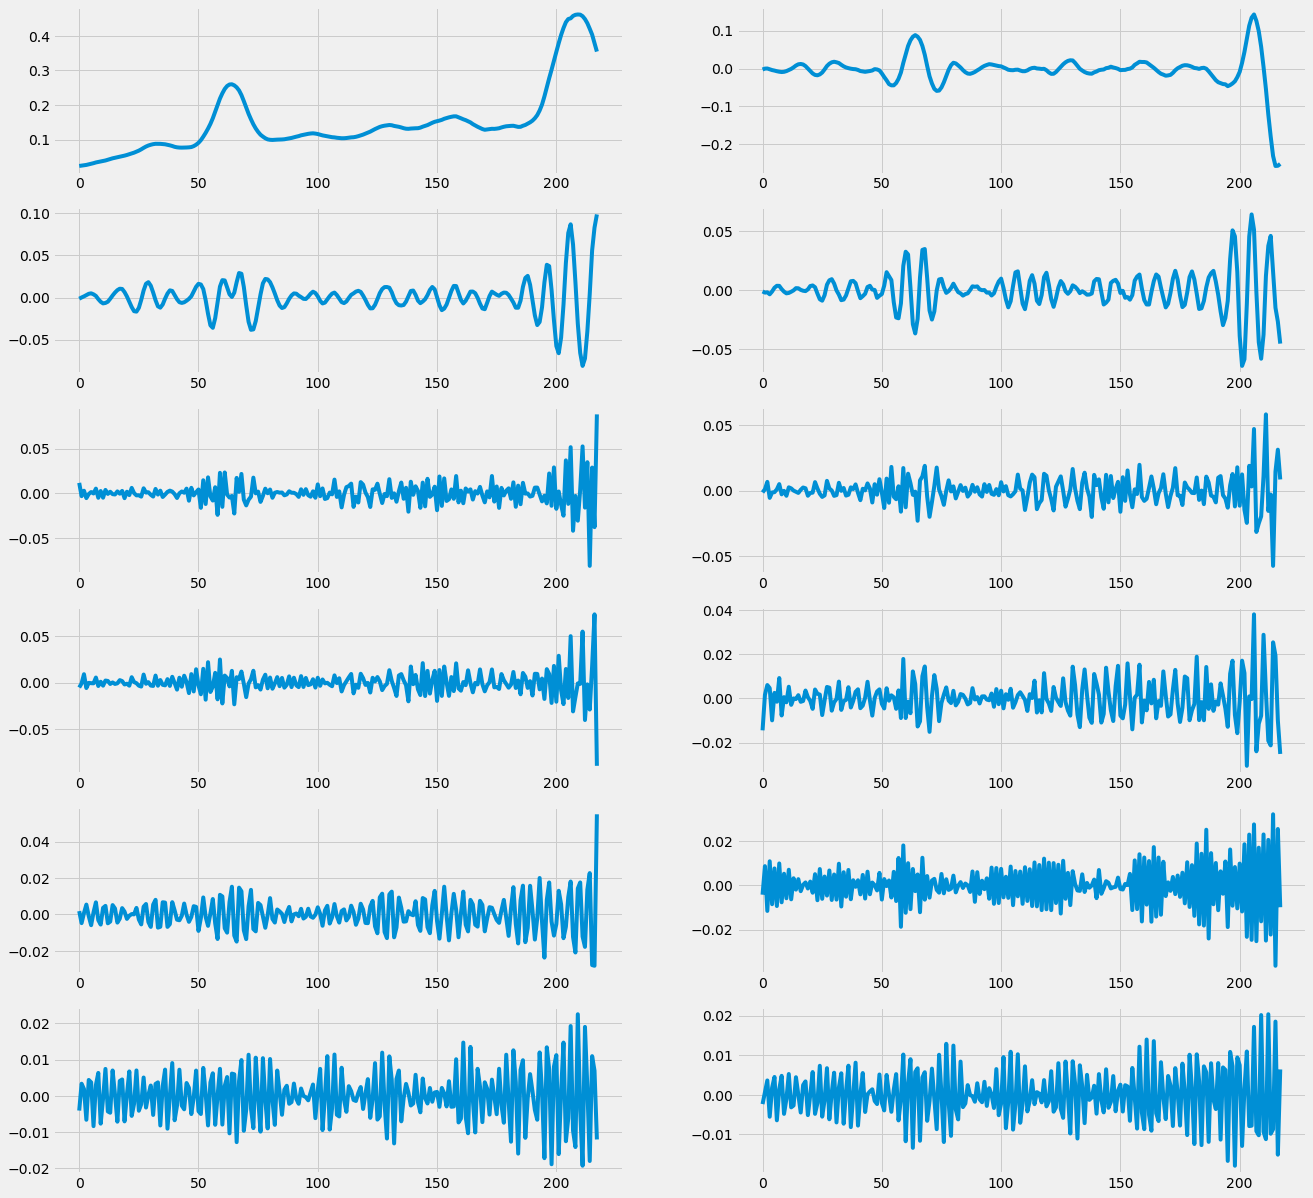

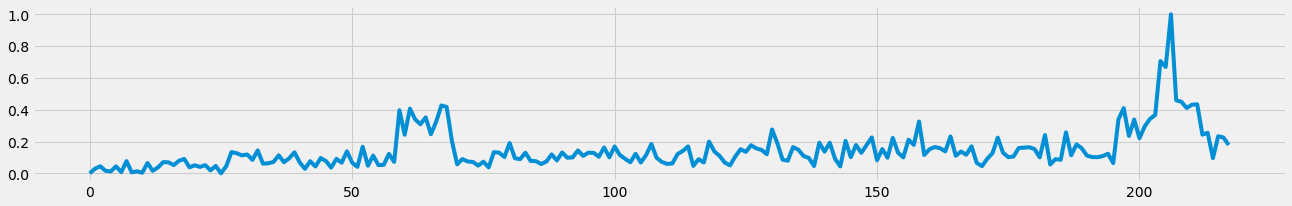

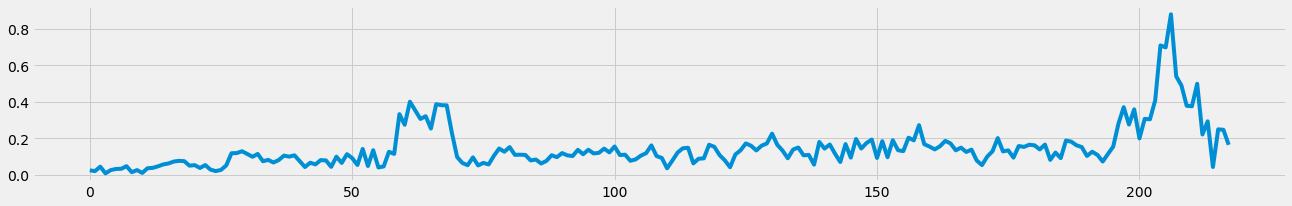

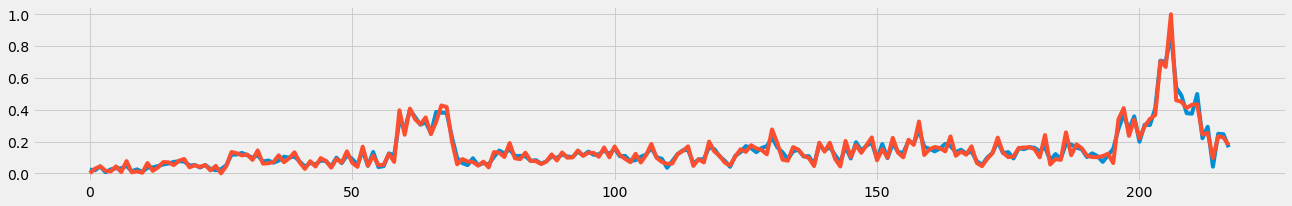

In [41]:
plt.figure(figsize=(20, 20))
for i in range(12):
    ax = plt.subplot(6,2,i+1)
    ax.plot(rec[i, :])

plt.figure(figsize=(20, 3))
plt.plot(series)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(Fs)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(Fs)
plt.plot(series)
plt.show()

In [42]:
print(rec)
type(rec)

[[ 2.38109333e-02  2.48069216e-02  2.56701947e-02 ...  4.03237608e-01
   3.79144780e-01  3.54268217e-01]
 [-2.53142371e-03 -1.94982099e-04  9.29013128e-05 ... -2.56633366e-01
  -2.56136854e-01 -2.51260387e-01]
 [-1.44416382e-03  4.77481585e-05  1.34823131e-03 ...  5.60786468e-02
   8.31631853e-02  9.88717888e-02]
 ...
 [-4.19006069e-03  8.72777401e-03 -1.15296154e-02 ... -3.63511254e-02
   2.55414008e-02 -9.85618844e-03]
 [-4.05994612e-03  3.34961825e-03  1.88059731e-03 ...  1.09482440e-02
   6.94884360e-03 -1.20214487e-02]
 [-2.33374744e-03  6.20087831e-04  3.62979131e-03 ...  1.84828689e-02
  -1.51028094e-02  6.40814434e-03]]


numpy.ndarray

In [43]:
dataFrame = pd.DataFrame(rec) 
                    
with pd.ExcelWriter('SSA.xlsx') as writer: # 一个excel写入多页数据
    dataFrame.to_excel(writer, sheet_name='Fed', float_format='%.6f')

E:\Anaconda\envs\tensorflow_gpu\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.6' currently installed).
  warnings.warn(msg, UserWarning)
